In [61]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt

# Rerun NERSC case

In [62]:
beam,lattice = impact.readInputFile('test_nersc.in')

reading ImpactZ input file (test_nersc.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [63]:
beam.nCore_y=4
beam.nCore_z=2

In [64]:
lattice[0]


 type: 'pipeinfo'

In [65]:
lattice[1]


 turns: 10000
  type: 'loop'

In [66]:
lattice[1].turns=100

In [67]:
impact.writeInputFile(beam,lattice)

In [ ]:
impact.run(beam,order=3)

In [ ]:
pLost = np.loadtxt('lost_partcl.data',skiprows=1, usecols=(0,1,2,3))

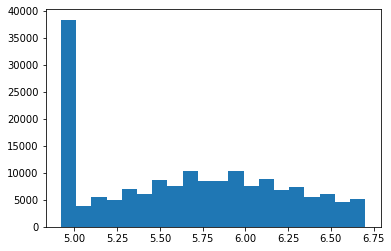

In [11]:
L = 39.968229720000004
plt.hist(np.mod(pLost[:,0],L),bins=20);

In [12]:
len(pLost)/100000.0

1.71894

# Run new lattice with sextupoles

In [69]:
beamNew,latticeNew = impact.readInputFile('test_iota_v8_4_SextOff_NLon.in')

reading ImpactZ input file (test_iota_v8_4_SextOff_NLon.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [70]:
beamNew.mass/beam.mass-1.0

3.868813980290042e-08

In [71]:
for item in latticeNew:
    if item.type == 'RFkick':
        item.vmax = 0.0
    if item.type == 'nonlinear_insert':
        NLfoward = item
    if 'length' in item:
        item.n_sckick = int(np.ceil(item.length*50))
        item.n_map = 1
NLfoward.n_sckick = 90
NLfoward.n_map = 1
NLfoward.strength_t = 0.4


# add QFF
latticeNew = impact.addHardEdgeQuad(latticeNew)

In [72]:
latticeNew[:3]

[
  type: 'pipeinfo',
 
  turns: 100
   type: 'loop',
 
       length: 0.02 [m]
     n_sckick: 1 [1]
        n_map: 1 [1]
  pipe_radius: 1.0 [m]
         type: 'drift']

In [73]:
latticeNew[1].turns=10

In [74]:
beamNew


         nCore_y: 4
         nCore_z: 2
             dim: 6
     n_particles: 1000000
      integrator: 'Linear'
     error_study: False
 standard_output: 'standard output'
         restart: False
        subcycle: False
         current: 0.0 [A]
  kinetic_energy: 2500000.0 [eV]
            mass: 938272081.3 [eV]
          charge: 1.0 [e]
       frequency: 30000000.0 [Hz]
           phase: 0.0 [rad]
            mesh: 'mesh' class
    distribution: 'distribution' class
    multi_charge: 'multi_charge' class

In [75]:
impact.writeInputFile(beamNew,latticeNew)

In [76]:
impact.run(beamNew,order=3)

0

In [77]:
pLost = np.loadtxt('lost_partcl.data',skiprows=1, usecols=(0,1,2,3))

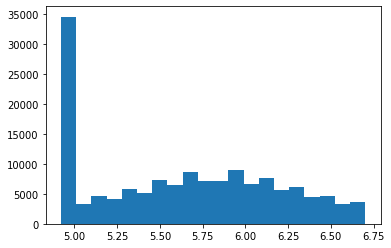

In [78]:
L = 39.968229720000004
plt.hist(np.mod(pLost[:,0],L),bins=20);

In [79]:
len(pLost)/100000.0

1.45655